In [24]:

# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [25]:
# fetching datasets
df1 = pd.read_csv('agri_farmers.csv')
df1.head()
     

,State,Marginal,Small,Semi-Medium,Medium,Large,All Holdings
0,Andhra Pradesh,2336409.71,2334051.98,2019756.63,1038253.92,275999.71,8004471.95
1,A & N Islands,2372.62,3737.81,7873.99,6128.93,1106.73,21220.07
2,Arunachal Pradesh,14356.78,30640.10,77432.38,153215.31,104294.92,379939.07
3,Assam,784971.32,696107.03,806250.00,410090.50,278835.70,2976254.56
4,Bihar,3727921.25,1178100.04,1075805.81,430508.89,44718.90,6457054.89


In [26]:
df2 = pd.read_csv('Agriculture_data.py')
df2.head()
     

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


Exploratory Data Analysis (EDA)
#Analysing the datasets

In [27]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (36, 7)
DF2 Shape:  (2238, 9)


In [28]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         36 non-null     object 
 1   Marginal      36 non-null     float64
 2   Small         36 non-null     float64
 3   Semi-Medium   36 non-null     float64
 4   Medium        36 non-null     float64
 5   Large         36 non-null     float64
 6   All Holdings  36 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-nu

In [29]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Marginal,Small,Semi-Medium,Medium,Large,All Holdings
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,1.054449e+06,1.012090e+06,1.032448e+06,8.712957e+05,3.892919e+05,4.215769e+06
std,1.531070e+06,1.447524e+06,1.482215e+06,1.483723e+06,1.029391e+06,5.973779e+06
min,2.095800e+02,1.921600e+02,2.311900e+02,1.689300e+02,3.185000e+01,9.132500e+02
25%,1.404024e+04,2.741995e+04,2.885612e+04,1.317636e+04,3.227827e+03,1.034229e+05
50%,3.386062e+05,2.423464e+05,1.955948e+05,1.497350e+05,6.660799e+04,9.712968e+05
75%,1.793617e+06,1.553955e+06,1.236766e+06,1.021770e+06,3.461695e+05,5.607827e+06
max,7.298326e+06,6.081054e+06,5.608049e+06,6.898760e+06,6.114290e+06,2.087330e+07


'<<< DATASET 2 >>>'

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


# conclusion 
UP has highest number of marginal farmers followed by Bihar.
Maharastra has highest number of small farmers followed by Uttrakhand.
Maharastra has highest number of semi-medium farmers followed by madhya pradesh.
Rajasthan has highest number of Medium farmers followed by madhya pradesh.
Rajasthan has highest number of Large farmers followed by maharastra.

findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.


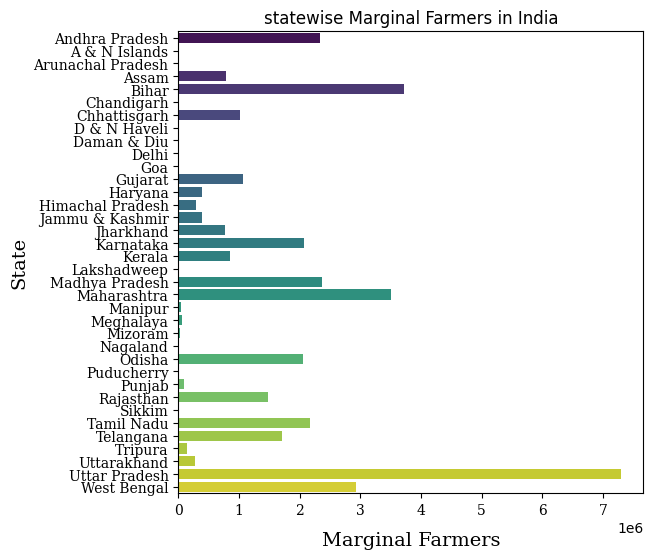

In [30]:
# Data visualisation of statewise different size group of farmers 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, y= df1['State'].sort_values(ascending=True), x='Marginal', hue='State',palette='viridis' )
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Marginal Farmers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='statewise Marginal Farmers in India', weight=200, family='serif, size=15, pad=12')
plt.show()

findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.


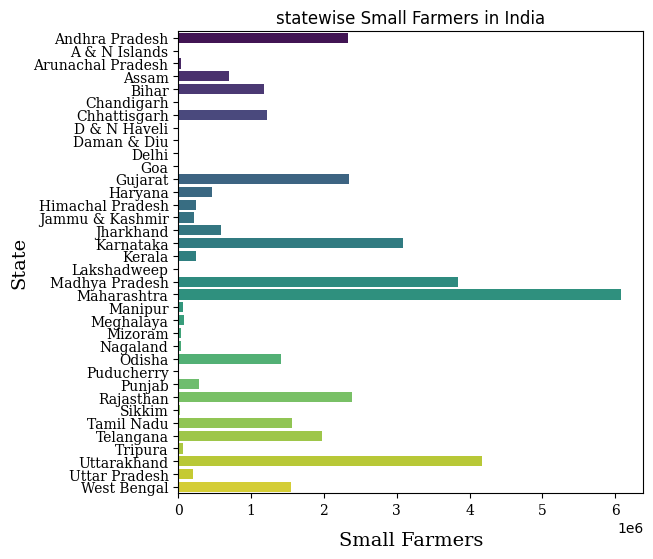

In [31]:
# Data visualisation of statewise different size group of farmers 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, y= df1['State'].sort_values(ascending=True), x='Small', hue='State',palette='viridis' )
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Small Farmers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='statewise Small Farmers in India', weight=200, family='serif, size=15, pad=12')
plt.show()

findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.


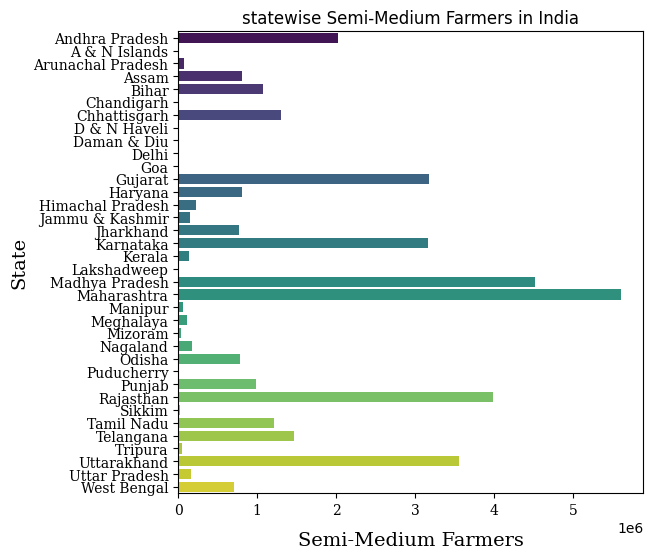

In [32]:
# Data visualisation of statewise different size group of farmers 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, y= df1['State'].sort_values(ascending=True), x='Semi-Medium', hue='State',palette='viridis' )
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Semi-Medium Farmers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='statewise Semi-Medium Farmers in India', weight=200, family='serif, size=15, pad=12')
plt.show()

findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.


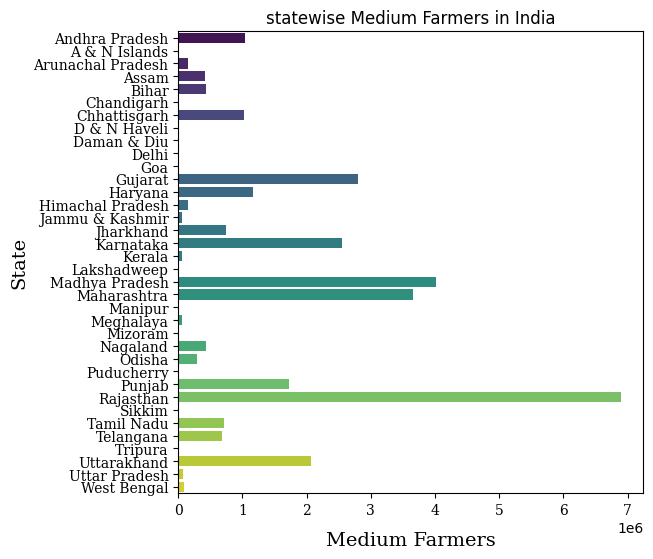

In [33]:
# Data visualisation of statewise different size group of farmers 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, y= df1['State'].sort_values(ascending=True), x='Medium', hue='State',palette='viridis' )
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Medium Farmers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='statewise Medium Farmers in India', weight=200, family='serif, size=15, pad=12')
plt.show()

findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.
findfont: Font family 'serif, size=15, pad=12' not found.


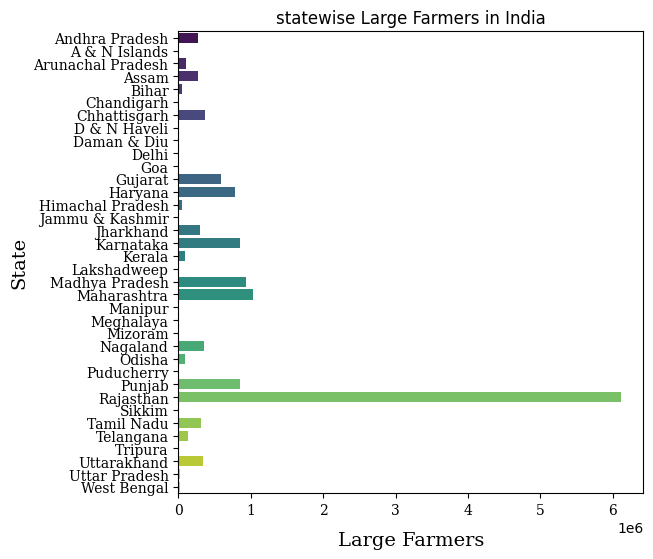

In [34]:
# Data visualisation of statewise different size group of farmers 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, y= df1['State'].sort_values(ascending=True), x='Large', hue='State',palette='viridis' )
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Large Farmers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='statewise Large Farmers in India', weight=200, family='serif, size=15, pad=12')
plt.show()

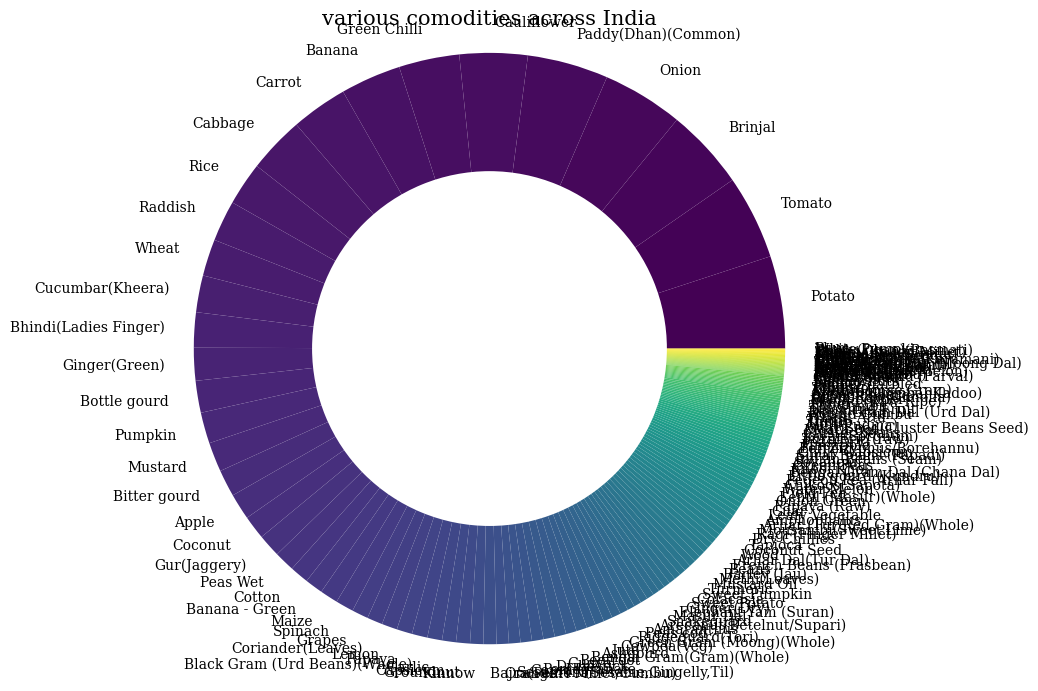

In [35]:
# Different Comodities across India
x = df2['commodity'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='various comodities across India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Price Comparison')

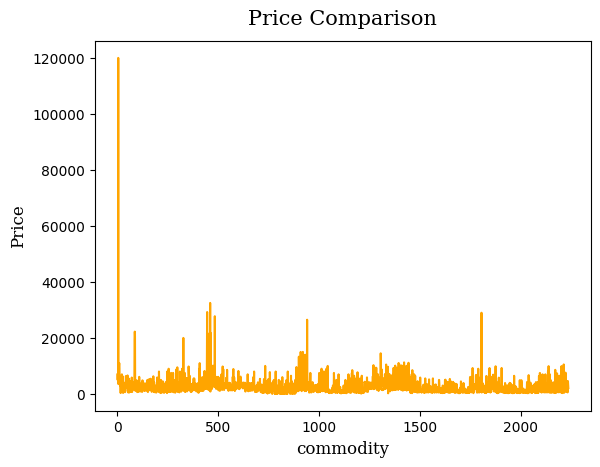

In [36]:
# plotting the price from dataset 2
plt.plot(df2['modal_price'], color='orange')
plt.xlabel('commodity', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12)

Text(0.5, 1.0, 'commodity Comparison')

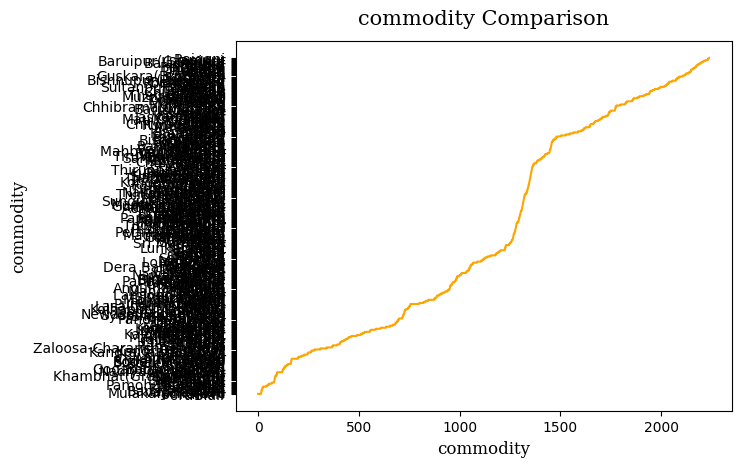

In [37]:
# plotting the price from dataset 2
plt.plot(df2['market'], color='orange')
plt.xlabel('commodity', family='serif', size=12)
plt.ylabel('commodity', family='serif', size=12)
plt.title('commodity Comparison', family='serif', size=15, pad=12)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9332\670733635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='state', y='commodity', errorbar=None, palette='viridis')


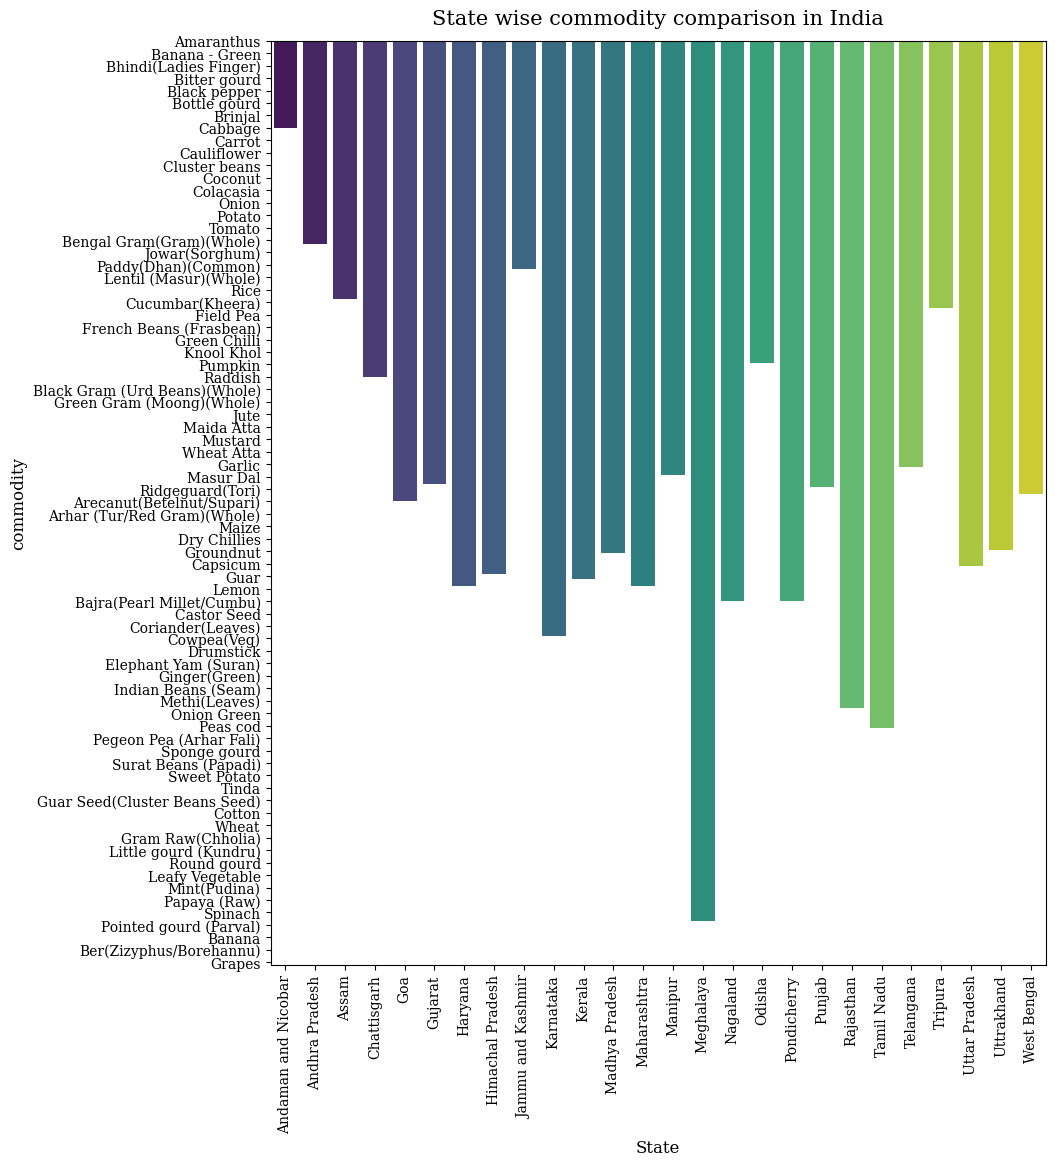

In [38]:
plt.figure(figsize=(10, 12))
sns.barplot(data=df2, x='state', y='commodity', errorbar=None, palette='viridis')
plt.xticks(rotation=90, family='serif')
plt.yticks(family='serif')
plt.xlabel('State', family='serif', size=12)
plt.ylabel('commodity', family='serif', size=12)
plt.title(label='State wise commodity comparison in India', family='serif', size=15, pad=12)
plt.show()

In [39]:
# selecting features for building a model
X = df1[['Marginal','Small','Semi-Medium','Medium','Large']]

In [40]:

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.026351,0.968389,-0.194101,-0.169057,0.058225
1,-1.341664,-0.400821,-0.107401,0.001342,0.000143
2,-1.212694,-0.468071,-0.065591,0.014760,-0.006443
3,-0.439465,-0.060037,-0.034916,-0.061658,0.119595
4,0.216626,1.623455,0.817468,0.028474,0.070563


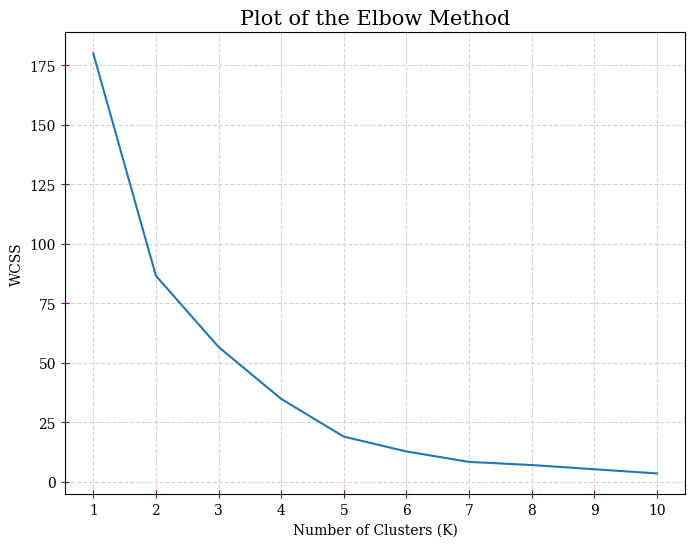

In [42]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Clusters (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [43]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=5, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=5, random_state=90)

In [44]:

# check the labels assigned to each data point
print(kmean.labels_)

[4 0 0 0 4 0 4 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 4 0 0 2 0 4 4 0 1 3 4]


In [45]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    22
4     7
1     5
2     1
3     1
Name: count, dtype: int64

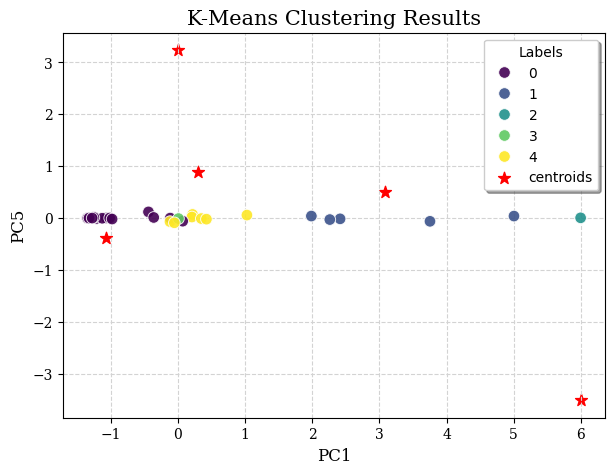

In [46]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC5', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC5', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()